# Dimensionality reduction

## Setup
### Imports

In [1]:
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
from sklearn.model_selection import train_test_split    # for classification
from sklearn.neighbors import KNeighborsClassifier      # for classification
from sklearn.decomposition import PCA                   # for Principal Component Analysis
import time                                             # for execution time measurement

### Loading the dataset

In [2]:
fives = np.loadtxt("fives.txt", delimiter=",")
sixes = np.loadtxt("sixes.txt", delimiter=",")

# for practical reasons, we convert these arrays to a pandas dataframe
df_fives = pd.DataFrame(fives)
df_sixes = pd.DataFrame(sixes)

# we also create a dataframe containing all numbers for later classification
df_fives["number"] = 5 # data labeling
df_sixes["number"] = 6 # data labeling
df = pd.concat([df_fives, df_sixes], ignore_index=True)
df_fives.drop("number", inplace=True,axis=1)
df_sixes.drop("number", inplace=True,axis=1)

### Utility functions

In [3]:
def show_image(row, title=""):
    """This function takes a row of 256 pixels and displays it as a greyscale image"""
    image = np.reshape(row, (16, 16))
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.show()


def split_data(data):
    X = data.drop("number", axis=1)
    y = data.number
    return train_test_split(X, y,
                            test_size=0.33,  # 33% of the data will be used for testing
                            random_state=42,  # ensures reproducibility of the test
                            stratify=y  # the proportion of each class remains the same in the train and test set
                            )


def print_knn_score(scores, data_type=""):
    max_score = max(scores)
    k_values_max_score = [i + 1 for i, v in enumerate(scores) if v == max_score]
    print(f'Max {data_type} score {max_score * 100} % for k = {[i for i in k_values_max_score]}')


def prediction_knn(data):
    """ KNN-based classification. """
    X_train, X_test, y_train, y_test = split_data(data)
    test_scores = []
    train_scores = []

    for k in range(1, 15):
        knn = KNeighborsClassifier(k)
        knn.fit(X_train, y_train)
        train_scores.append(knn.score(X_train, y_train))  # "score" for KNN is the accuracy of the classification
        test_scores.append(knn.score(X_test, y_test))

    print_knn_score(train_scores, "train")
    print_knn_score(test_scores, "test")


def run_measure_time(function, **kwargs):
    start_time = time.time()
    function(**kwargs)
    print("--- %s seconds ---" % (time.time() - start_time))

### Baseline test

In [4]:
run_measure_time(prediction_knn, data=df)

Max train score 100.0 % for k = [1]
Max test score 98.51116625310173 % for k = [1]
--- 1.1789586544036865 seconds ---


### Observing the dataset

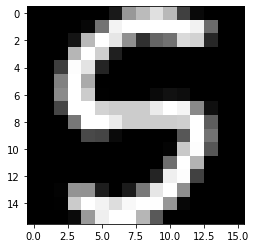

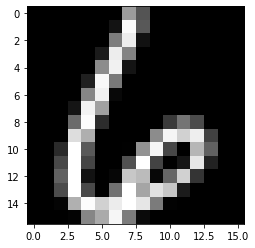

In [5]:
index = 27 # index of the image to show
show_image(fives[index, :])
show_image(sixes[index, :])
# to do the same from a pandas dataframe
# show_image(df_fives.iloc[0].to_numpy())

Using what you have learned in the previous lessons, examine the dataset and see what you can learn about it.

In [6]:
#df.shape
df5 = df[df["number"] == 5]
df6 = df[df["number"] == 6]

print(df5.shape)
print(df6.shape)

(556, 257)
(664, 257)


In [7]:
df6

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,number
556,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.631,0.862,-0.167,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.0,-1.0,6
557,-1.0,-1.0,-1.0,-1.0,-1.0,-0.397,0.983,-0.535,-1.000,-1.000,...,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.0,-1.0,6
558,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.270,0.973,...,0.628,0.573,-0.184,-0.891,-1.000,-1.000,-1.000,-1.0,-1.0,6
559,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.701,0.708,-0.722,...,0.883,-0.249,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,6
560,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,0.023,0.782,...,0.610,1.000,0.472,-0.864,-1.000,-1.000,-1.000,-1.0,-1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.290,0.972,...,0.573,0.529,0.133,-0.652,-1.000,-1.000,-1.000,-1.0,-1.0,6
1216,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.599,0.309,1.000,...,0.897,1.000,1.000,0.940,0.233,-0.474,-0.941,-1.0,-1.0,6
1217,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.981,-0.572,0.687,0.592,...,0.269,-0.505,-0.962,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,6
1218,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-0.921,-0.249,0.460,0.826,...,0.138,0.996,0.676,-0.381,-1.000,-1.000,-1.000,-1.0,-1.0,6


**Comment**

This dataset contains 1120 observations, 256 features and 2 classes. Each observation is a hand-written digit coded with 16x16 pixels (gray scale) and each feature measures the intensity of acertain pixel (value between -1 and 1).

The class "5" indicates the hand-written digit is a five and the class "6" indicates it is a six.

The dataset is slightly imbalanced with 664 sixes and only 556 fives.

## Principal Component Analysis (PCA)
### Pre-processing

When using PCA, it is necessary to standardize the data. Pixel values are already between -1 and 1, so we only need to center the data.
Using what you have learned last time, center the data in `df_fives` and `df_sixes` respectively.

*Hint: You can refer to the data preparation practical and use `sklearn`'s `StandardScaler`*.

⚠️Centering means removing the mean value. You do not need to divide by the standard deviation. `sklearn`'s `StandardScaler` lets you do that, check its documentation to see how.
⚠️Store the standardized data in new variables, because we will need the original data later.

In fact, this step is not strictly necessary here, because we will use `sklearn`'s implementation of PCA, which already includes standardization. However, it is important to keep in mind the importance of this step (and to know how to do it yourself).

In [8]:
from sklearn.preprocessing import StandardScaler

scaler_centered = StandardScaler(with_std=False)

df5_centered = pd.DataFrame(scaler_centered.fit_transform(df_fives)/2)  # We divide by 2 to remain between -1 and +1
df6_centered = pd.DataFrame(scaler_centered.fit_transform(df_sixes)/2)  # We divide by 2 to remain between -1 and +1

### Understanding what PCA does
In this part, we will try to visualize what PCA does. For this, we will start with an "average" image, and progressively add PCA components. For this visualization step, we will only be using the dataframe containing the handwritten fives.

#### Step 1: Compute the "average 5"
Create a vector (pandas Series, for example) that contains the "mean 5".
Display this vector as an image. How do you interpret this ?

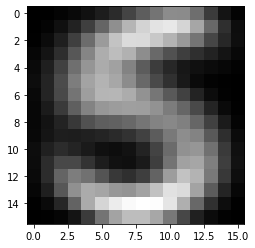

In [9]:
avg_5 = df_fives.mean(axis = 0)

show_image(avg_5.to_numpy())

**Answer**

Each pixel of this image is the mean value of this pixel among the 556 observations of fives.

#### Step 2: Obtain the components from PCA
Read the code cell below. Using the documentation, explain what is done at each step.

In [10]:
pca = PCA()                              # Instantiate the PCA operator
pca.fit(df_fives)                        # Calculate the components and the projections for the dataset
components5 = pca.components_            # Store the value of the PCA components
projection5 = pca.transform(df_fives)    # Store the value of the projections relative to the PCA components

#### Step 3: Reconstruct an image progressively
In this part, we will reconstruct an image from its PCA components.

**Questions**:
- Understand and explain the line marked with a question mark ❓.
- Observe the resulting images. How many components are necessary to obtain a "nice" image? How do you interpret this?
- By modifying the code below, try displaying other instances of the number five from the dataset.

**Answers**

- By definition of the PCA, the original image is equal to the sum of the mean image and the products of the PCA components with the projection coefficient relative to the component. The line with a question marks reconstructs the original image step by step starting from the mean image (cf. code below).
- It depends on how you define a "nice" image but the first components inscreases the image quality far more than the latest. The image is quite "nice" already using only 10 of the 256 components.
- To display another instance of the number five, you simply have to change the "image_index" value in the cell below to a number between 0 and 555 and run the code.

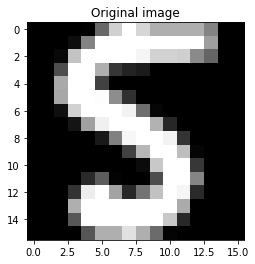

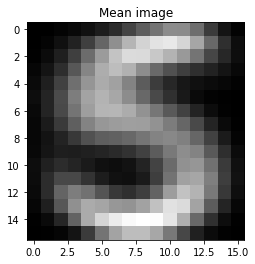

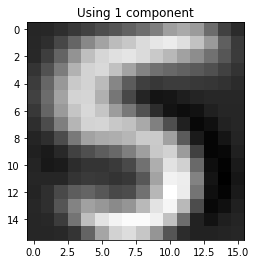

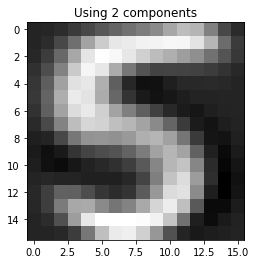

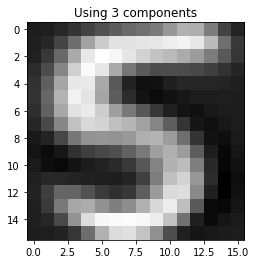

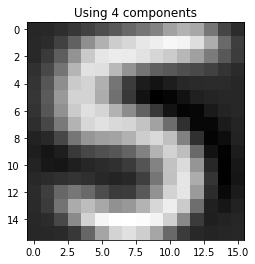

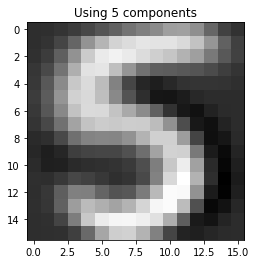

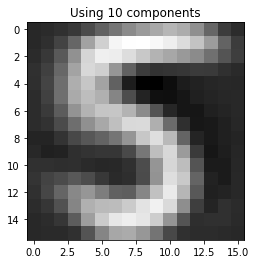

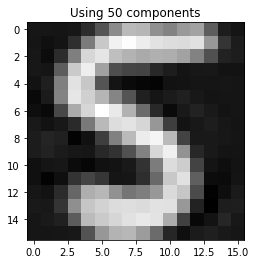

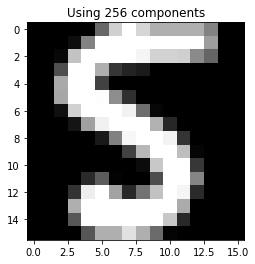

In [11]:
image_index = 3
original_image = df_fives.iloc[image_index].to_numpy()
show_image(original_image, "Original image")      # we first display the original image

reconstructed_image = df_fives.mean().to_numpy()
show_image(reconstructed_image, "Mean image") # then we display the mean image

for i in range(0,5): # and finally we reconstruct the image using the components
    reconstructed_image = reconstructed_image + projection5[image_index,i] * components5[i] # ❓
    show_image(reconstructed_image, f"Using {i+1} component{'s' if i>0 else ''}")

for i in range(5,10): # and finally we reconstruct the image using the components
    reconstructed_image = reconstructed_image + projection5[image_index,i] * components5[i] # ❓
show_image(reconstructed_image, f"Using {10} components")

for i in range(10,50): # and finally we reconstruct the image using the components
    reconstructed_image = reconstructed_image + projection5[image_index,i] * components5[i] # ❓
show_image(reconstructed_image, f"Using {50} components")

for i in range(50,256): # and finally we reconstruct the image using the components
    reconstructed_image = reconstructed_image + projection5[image_index,i] * components5[i] # ❓
show_image(reconstructed_image, f"Using {256} components")

### Using PCA for classification
A possible use for dimensionality reduction is to help machine learning algorithms.
In the code cell below, we use PCA for the entire dataset (numbers 5 and 6) and store the projection coefficients in the `projection` variable.
`df_projection` contains the same data as a `pandas` dataframe.

In [12]:
df_unlabeled = df.drop("number", inplace=False, axis=1)
pca = PCA()
pca.fit(df_unlabeled)
projection = pca.transform(df_unlabeled)

df_projection = pd.DataFrame(projection)
df_projection["number"] = df["number"] # label the data for visualization and classification

#### Questions
- Using the code in the cell below, display a two-dimensional `scatterplot` with a different color for 5's and 6's. Which dimensions should you use?
- What can you observe? How do you think this can help machine learning algorithms?
- Try changing the features you display. How does the `scatterplot` change? How do you interpret this?
- Try performing a prediction on the two-dimensional dataset. Compare the results with the baseline test on the full dataset, both in terms of accuracy and computational time. How do you interpret this?

**Answers**


- The most precious information to differentiate the observations is contained in the first projections coefficients of the PCA analysis. Consequently, for a two-dimensional scatterplot, we should use the two first projection coefficients (cf. code below).

- Only with these two dimensions, fives and sixes occupy areas of the graph that have small intersections. It means that these two dimensions are already providing the opportunity to train a classifier to be fairly accurate. Using two features instead of 256 could reduce the computing time substantially.


- The points are more mixed when using other pairs of projection coefficients, which confirms that the most discriminant information is contained in the first projection coefficients.


- The prediction accuracy drops from 98.5% to 97.3% and decreased by 25%. Data scientists try to get the best prediction accuracy with the lowest running time. With huge datasets, running time becomes a constraint. PCA is therefore an interesting method to decrease the running time without affecting the performance of the model too much. However, to compare both methods fairly, we should add the running time of the PCA to the running time of the model with PCA before comparing it to the running time of the model without PCA. Though in this example, the PCA running time can be neglected in front of the KNN algorithm running time

<Axes: xlabel='0', ylabel='1'>

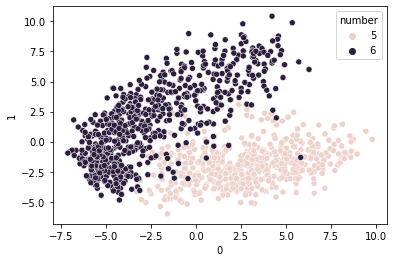

In [13]:
dimension1 = 0   # should be an integer indicating which PCA component to pick
dimension2 = 1    # should be an integer indicating which PCA component to pick
df_two_dimensional = df_projection[[dimension1, dimension2, "number"]]

sns.scatterplot(data = df_two_dimensional, x = dimension1, y = dimension2, hue="number")

In [14]:
run_measure_time(prediction_knn, data = df)
run_measure_time(prediction_knn, data = df_two_dimensional)

Max train score 100.0 % for k = [1]
Max test score 98.51116625310173 % for k = [1]
--- 1.0392813682556152 seconds ---
Max train score 100.0 % for k = [1]
Max test score 97.27047146401985 % for k = [12]
--- 0.7599763870239258 seconds ---
